In [30]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
from google.colab import files

# Subir imagen
uploaded = files.upload()

Saving depositphotos_458074174-stock-photo-march-2021-display-baby-yoda.jpg to depositphotos_458074174-stock-photo-march-2021-display-baby-yoda.jpg


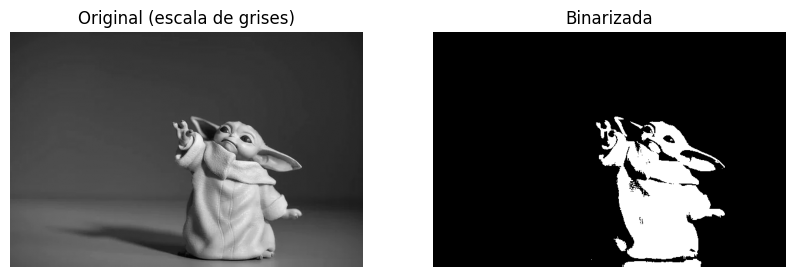

In [36]:
# Obtener el nombre del archivo
filename = next(iter(uploaded))

# Leer la imagen en escala de grises
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Paso 3: Binarizar la imagen con un umbral fijo (por ejemplo, 200)
_, binary_img = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY)

# Paso 4: Mostrar la imagen original y la binarizada
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original (escala de grises)")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Binarizada")
plt.imshow(binary_img, cmap='gray')
plt.axis('off')

plt.show()

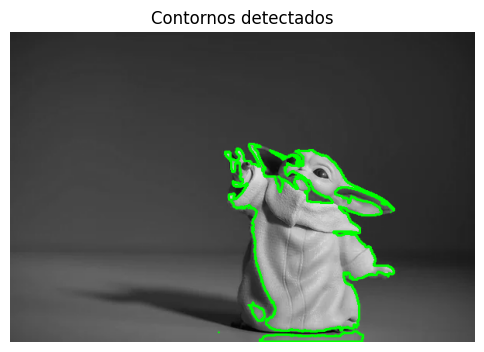

In [37]:
# Detectar contornos
contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos sobre una copia de la imagen original (en color)
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # convertir a BGR para dibujar en color
cv2.drawContours(img_color, contours, -1, (0, 255, 0), 2)  # contornos verdes

# Mostrar imagen con contornos
plt.figure(figsize=(6,6))
plt.title("Contornos detectados")
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


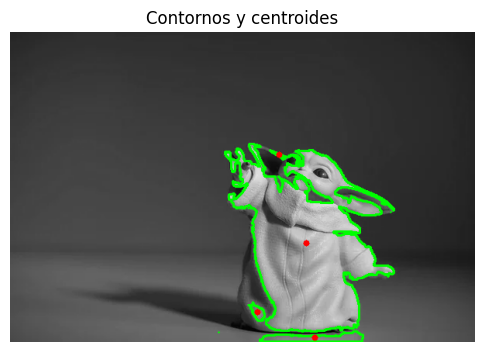

In [42]:
# Recorremos cada contorno
for i, contour in enumerate(contours):
    # Área
    area = cv2.contourArea(contour)

    # Perímetro
    perimeter = cv2.arcLength(contour, True)

    # Momentos para calcular el centroide
    M = cv2.moments(contour)

    # Centroide (cx, cy) con manejo de división por cero
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

# Dibujar centroides sobre la imagen con contornos
for contour in contours:
    M = cv2.moments(contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.circle(img_color, (cx, cy), 4, (0, 0, 255), -1)  # punto rojo

# Mostrar imagen final
plt.figure(figsize=(6,6))
plt.title("Contornos y centroides")
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

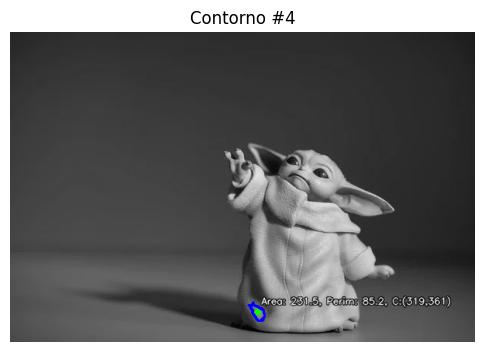

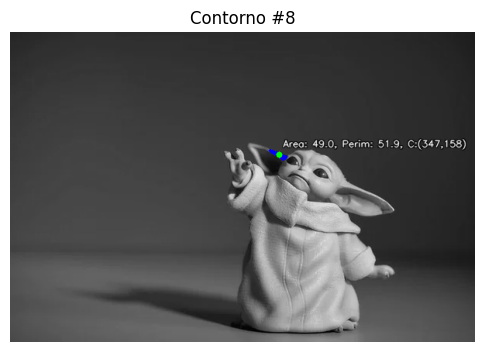

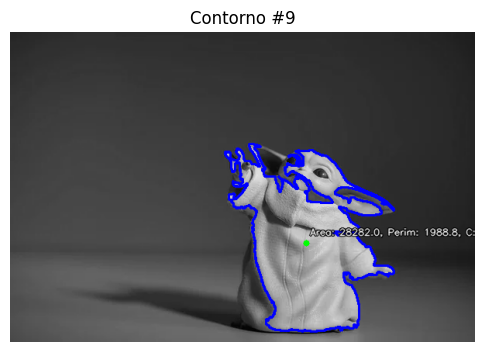

In [44]:
# Contornos que queremos mostrar (índices 3, 7 y 8 corresponden a las figuras #4, #8 y #9)
indices_deseados = [3, 7, 8]

for i in indices_deseados:
    contour = contours[i]

    # Crear copia de la imagen original
    img_copy = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Dibujar el contorno
    cv2.drawContours(img_copy, [contour], -1, (255, 0, 0), 2)  # azul

    # Calcular propiedades
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0

    # Dibujar el centroide
    cv2.circle(img_copy, (cx, cy), 4, (0, 255, 0), -1)  # verde

    # Crear texto con métricas
    text = f"Area: {area:.1f}, Perim: {perimeter:.1f}, C:({cx},{cy})"

    # Escribir texto cerca del centroide (o arriba)
    cv2.putText(img_copy, text, (cx + 5, cy - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 2, cv2.LINE_AA)
    cv2.putText(img_copy, text, (cx + 5, cy - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1, cv2.LINE_AA)

    # Mostrar resultado
    plt.figure(figsize=(6, 6))
    plt.title(f"Contorno #{i+1}")
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


